### la question que l'on se pose est la suivante :

### Comment est répartis le poids des acteurs sur la blockchain

In [496]:
import pandas as pd
from os import path
import os
from datetime import datetime
import matplotlib.pyplot as plt
import glob
import numpy as np
import plotly.express as px

In [497]:
# extraction of all the csv files in the folder into dataframes
ext_path = './timeseries/external.csv'
external_df = pd.read_csv(ext_path, sep=',', header=0, index_col=1, parse_dates=True)
external_df.drop(['Unnamed: 0'], axis=1, inplace=True)

glob_path = './timeseries/global.csv'
transactions_df = pd.read_csv(glob_path, sep=',', header=0, index_col=0, parse_dates=True)
# drop the original "year", "month", and "day" columns
transactions_df.drop(columns=['year', 'month', 'day'], inplace=True)

actor_df = pd.read_csv('timeseries/blockchain_by_actor.csv', index_col=0)
# Remove lines where year = 0
actor_df = actor_df[actor_df['year'] != 0]
# combine "year", "month", and "day" columns into a single datetime column
actor_df['date'] = pd.to_datetime(actor_df[['year', 'month', 'day']])
# drop the original "year", "month", and "day" columns
actor_df.drop(columns=['year', 'month', 'day'], inplace=True)
# Change the nb_received and nb_transactions and nb_spent and sum_fee columns to integers
actor_df = actor_df.astype({'nb_received': 'int64', 'nb_transactions': 'int64', 'nb_spent': 'int64', 'sum_fee': 'int64'})
# set the index to the identity of the actor
#actor_profits_df.set_index('identity', inplace=True)
#actor_profits_df = actor_profits_df.groupby([actor_profits_df.index, 'date']).sum()


"""
fileNames = glob.glob('networks/*')
#print(fileNames)
file_dict = {
    datetime.strptime(path.basename(file).split('.')[0], '%Y-%m-%d'): pd.read_csv(file)
    for file in fileNames
}

network_df = pd.concat(file_dict).sort_index()"""
print('loading data done')


loading data done


Pour notre étude on va s'intérésser seulement a l'année 2015

In [498]:
# only keep data of 2015

external_df = external_df[external_df.index.year == 2015]
external_df.head()

,PriceUSD,HashRate
date,,
2015-01-02,315.942732,333345.017260
2015-01-03,285.647310,327284.198765
2015-01-04,263.334575,347486.927083
2015-01-05,275.003852,315162.561773
2015-01-06,287.549521,319203.107437


In [499]:
transactions_df = transactions_df[transactions_df.index.year == 2015]
transactions_df.head()

,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
2015-01-01,801373971,45473028339385,45058028339385,13609.829337,4.284054e+06,0.799999,58882,161194,2.595241,2.737577,166,415801373971,415000000000,2757774885900,45473028339385,42715253453485
2015-01-02,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,0.778933,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2015-01-03,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,0.797419,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
2015-01-04,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,0.899054,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
2015-01-05,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,0.898594,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197


In [500]:
actor_df = actor_df[actor_df['date'].dt.year == 2015]
actor_df.head()

,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,HappyCoins.com,1.377590e+09,4,2015-01-01,49596,0.004957,4,1.277500e+09,0.0,0.0,8,1.277500e+09
1,821,2.476057e+09,5,2015-01-01,10000,0.000851,1,1.174552e+09,0.0,0.0,2,1.174552e+09
2,FortuneJack.com,1.201470e+08,29,2015-01-01,83000,0.194670,11,1.541127e+08,14158970.0,14158970.0,22,1.399538e+08
3,396,1.906135e+10,70,2015-01-01,540000,0.023738,54,1.842989e+10,0.0,0.0,108,1.842989e+10
4,SatoshiMines.com,7.401319e+08,193,2015-01-01,740000,0.447934,45,1.813624e+09,35044568.0,35044568.0,84,1.778579e+09


In [501]:
#network_df = network_df[network_df.index == 2015]
#network_df.head()

On veut récupérer les acteurs ayant fait le plus de profit en dolar sur toute la période proposée, pour cela on calcul le bénéfice journalier effectué grace a cette formule

received - (spent - self_spent) - sum_fee

In [502]:
actor_df.set_index('identity', inplace=True)
actor_df = actor_df.groupby([actor_df.index, 'date']).sum()

# add a new column to the actor_df dataframe that contains the balance of the actor calculated as : received - (spent - self_spent) - sum_fee
actor_df['balance'] = actor_df['received'] - (actor_df['spent'] - actor_df['self_spent']) - actor_df['sum_fee']
actor_df.head()

received  nb_received   sum_fee  mean_fee_for100  \
identity date                                                               
0        2015-01-01  3.021860e+10         4265  12350755         1.926137   
         2015-01-02  3.401216e+10         8395  15588104         1.882565   
         2015-01-03  2.546280e+11        10004  14742886         1.984796   
         2015-01-04  2.431648e+11         9007  18683447         2.075441   
         2015-01-05  4.882942e+10         6553  15866463         1.883876   

                     nb_transactions          sent  self_spent  \
identity date                                                    
0        2015-01-01              783  3.001272e+10         0.0   
         2015-01-02              962  3.400937e+10         0.0   
         2015-01-03              943  2.517348e+11         0.0   
         2015-01-04             1059  2.429788e+11         0.0   
         2015-01-05              995  4.926332e+10         0.0   

                     self_spent_estimated  nb_spent         spent  \
identity date                                                       
0        2015-01-01          0.000000e+00      1696  3.001272e+10   
         2015-01-02          0.000000e+00      2068  3.400937e+10   
         2015-01-03          2.011365e+11      2039  5.059830e+10   
         2015-01-04          2.004149e+11      2293  4.256388e+10   
         2015-01-05          0.000000e+00      2098  4.926332e+10   

                          balance  
identity date                      
0        2015-01-01  1.935257e+08  
         2015-01-02 -1.280615e+07  
         2015-01-03  2.040150e+11  
         2015-01-04  2.005823e+11  
         2015-01-05 -4.497694e+08

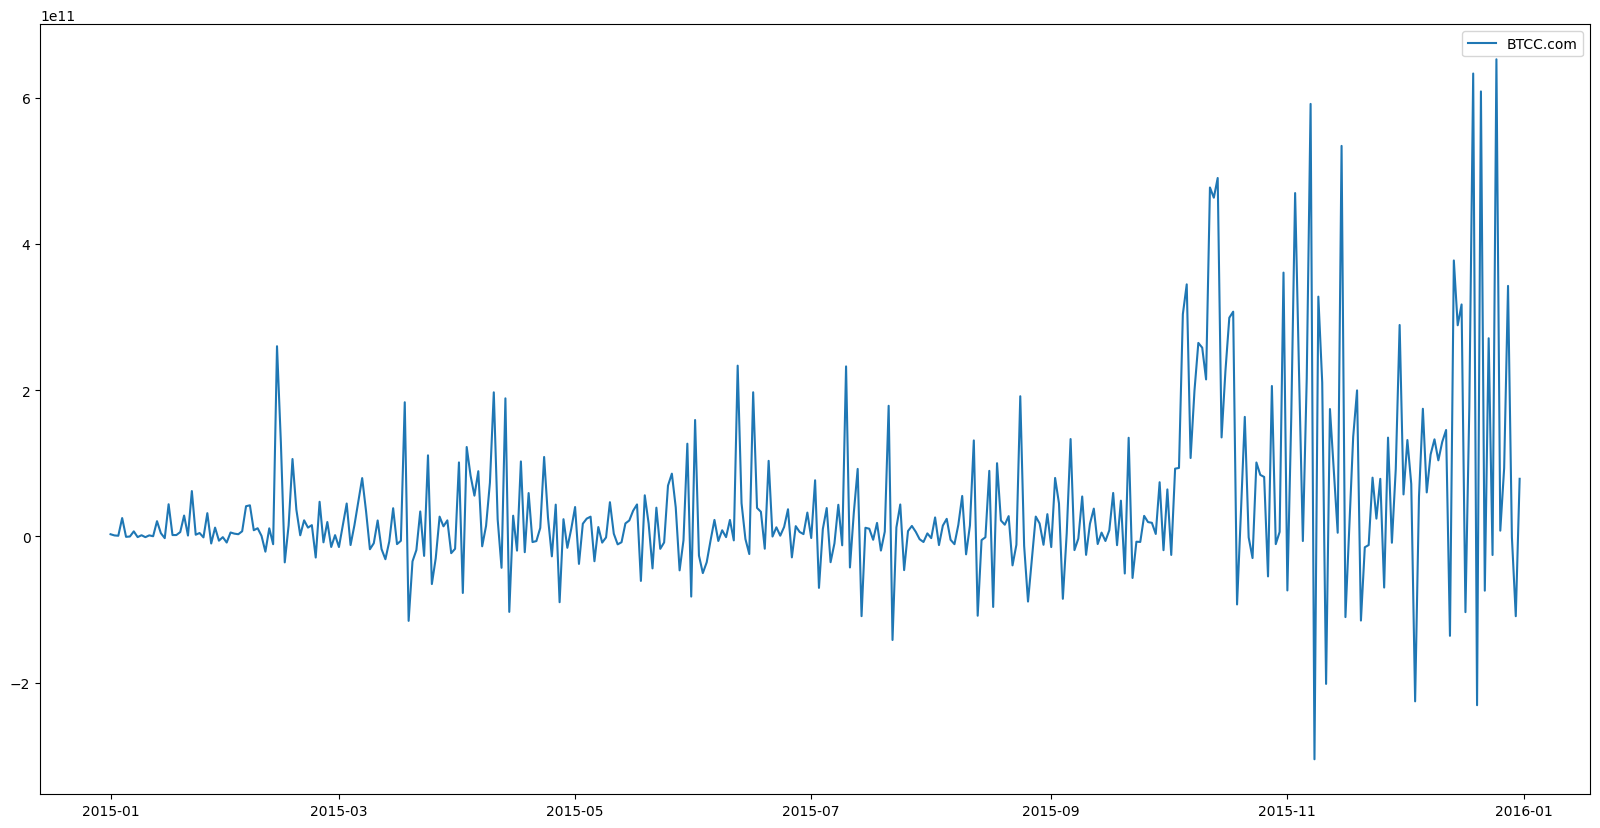

In [503]:
plt.figure(figsize=(20,10))
look = ['balance']
#plt.plot(actor_df.loc['Paymium.com'].index, actor_df.loc['Paymium.com'][look], label='Paymium.com')
#plt.plot(actor_df.loc['HaoBTC.com'].index, actor_df.loc['HaoBTC.com'][look], label='HaoBTC.com')
#plt.plot(actor_df.loc['OKCoin.com'].index, actor_df.loc['OKCoin.com'][look], label='OKCoin.com')
plt.plot(actor_df.loc['BTCC.com'].index, actor_df.loc['BTCC.com'][look], label='BTCC.com')
#plt.plot(actor_df.loc['Poloniex.com'].index, actor_df.loc['Poloniex.com'][look], label='Poloniex.com')
plt.legend()
plt.show()

on récupére le profit, le profit correspond a la somme des benefices journaliers du debut au jour voulu, le profit total est donc le profit du dernier jour

In [504]:
# compute the profits wich is the cumsum of each actor balance
actor_df['profit'] = actor_df.groupby(level=0)['balance'].cumsum()

actor_df.loc['ePay.info_CoinJoinMess'].head()

,received,nb_received,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent,balance,profit
date,,,,,,,,,,,,
2015-01-01,5.482961e+11,12818,38239914,0.524910,1148,2.470622e+12,1.794224e+12,1.898125e+12,20749,5.724979e+11,1.769984e+12,1.769984e+12
2015-01-02,1.259197e+12,19625,62774624,0.433979,2145,4.627579e+12,3.294133e+12,3.310133e+12,41870,1.317446e+12,3.235821e+12,5.005805e+12
2015-01-03,1.505475e+12,17609,65207667,0.702425,1696,4.967562e+12,3.536510e+12,3.536510e+12,24355,1.431051e+12,3.610868e+12,8.616673e+12
2015-01-04,1.764592e+12,16536,61792309,0.583889,1487,4.893706e+12,3.061963e+12,3.061963e+12,23306,1.831743e+12,2.994749e+12,1.161142e+13
2015-01-05,1.374703e+12,29140,93421193,0.330920,2440,4.604852e+12,3.214107e+12,3.214107e+12,41958,1.390745e+12,3.197972e+12,1.480939e+13


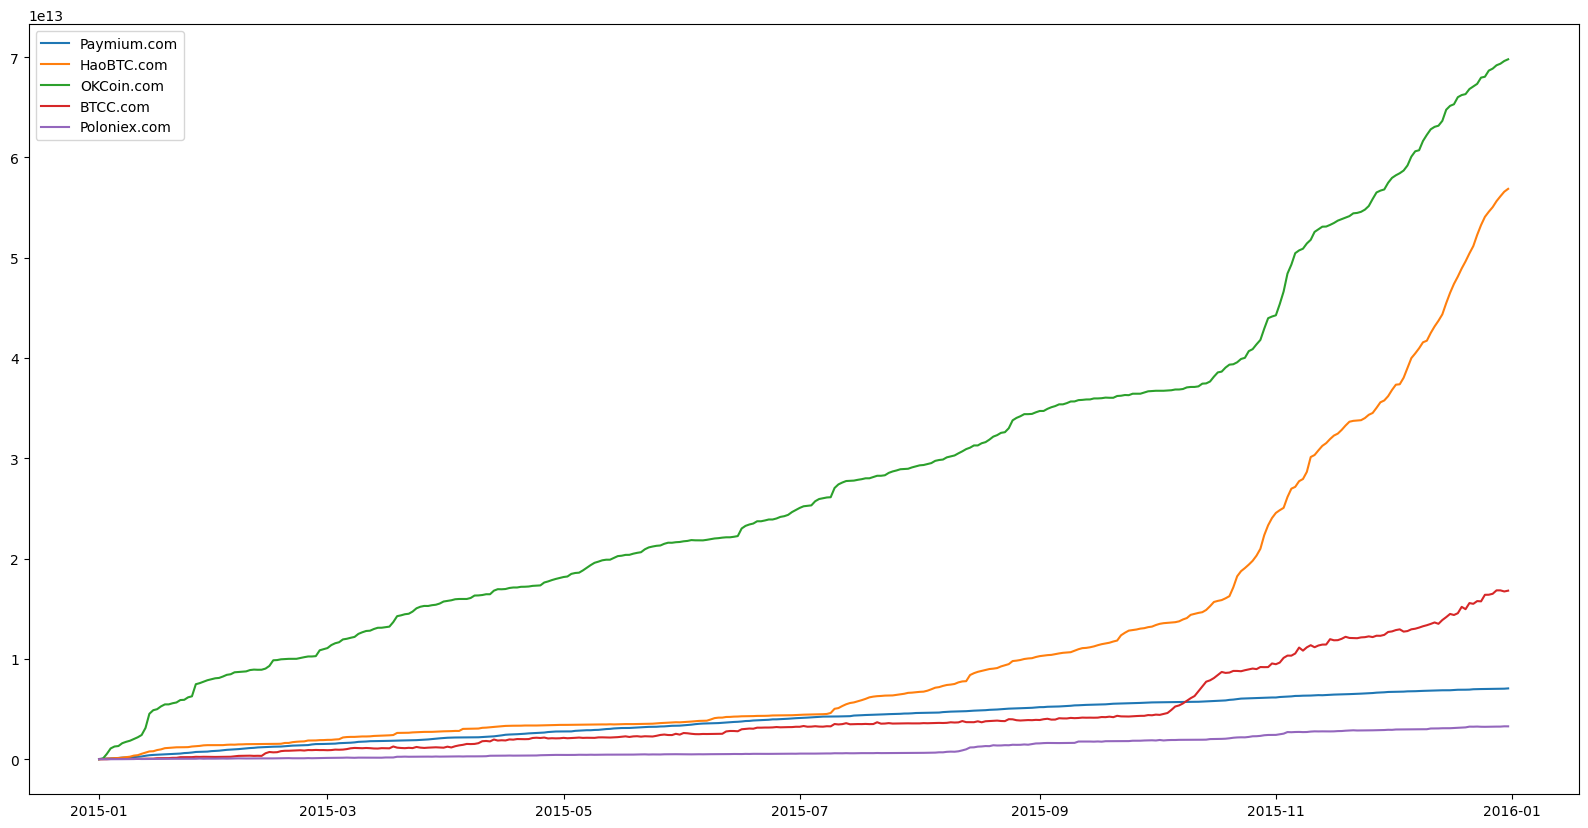

In [505]:
plt.figure(figsize=(20,10))
look = ['profit']
plt.plot(actor_df.loc['Paymium.com'].index, actor_df.loc['Paymium.com'][look], label='Paymium.com')
plt.plot(actor_df.loc['HaoBTC.com'].index, actor_df.loc['HaoBTC.com'][look], label='HaoBTC.com')
plt.plot(actor_df.loc['OKCoin.com'].index, actor_df.loc['OKCoin.com'][look], label='OKCoin.com')
plt.plot(actor_df.loc['BTCC.com'].index, actor_df.loc['BTCC.com'][look], label='BTCC.com')
plt.plot(actor_df.loc['Poloniex.com'].index, actor_df.loc['Poloniex.com'][look], label='Poloniex.com')
plt.legend()
plt.show()

on veut passer le profit en USDollar pour avoir une meilleur idée de l'ordre de grandeur

In [506]:
# using the profit column and the external_df dataframe, we can compute the profit of the exchanges in USD
# we need to convert the profit in BTC to USD

# first we need to create a small dataframes with only the date, the actor and the profit
actor_profits_df = actor_df[['profit']]

# we need to compute the profit in USD using the external_df dataframe
# we need to merge the two dataframes on the date column
actor_profits_df = actor_profits_df.merge(external_df[['PriceUSD']], left_index=True, right_index=True)
actor_profits_df.head()


profit    PriceUSD
identity date                                
0        2015-01-02  1.807196e+08  315.942732
         2015-01-03  2.041957e+11  285.647310
         2015-01-04  4.047780e+11  263.334575
         2015-01-05  4.043282e+11  275.003852
         2015-01-06  7.076734e+11  287.549521

In [507]:
# we can now compute the profit in USD
actor_profits_df['profit_usd'] = actor_profits_df['profit'] / 1e9 * actor_profits_df['PriceUSD']
actor_profits_df.head()

profit    PriceUSD     profit_usd
identity date                                               
0        2015-01-02  1.807196e+08  315.942732      57.097035
         2015-01-03  2.041957e+11  285.647310   58327.956877
         2015-01-04  4.047780e+11  263.334575  106592.036495
         2015-01-05  4.043282e+11  275.003852  111191.814421
         2015-01-06  7.076734e+11  287.549521  203491.134947

In [508]:
# get these in a list
top_actors = actor_profits_df.groupby(level=0)['profit_usd'].max().sort_values(ascending=False).head().index.tolist()

# show the top 5 actor with the highest profit
actor_profits_df.groupby(level=0)['profit_usd'].max().sort_values(ascending=False).head()




identity
ePay.info_CoinJoinMess    1.185568e+09
Huobi.com                 3.248009e+08
Bitstamp.net              2.584437e+08
Xapo.com                  1.181836e+08
BTC-e.com                 5.774306e+07
Name: profit_usd, dtype: float64

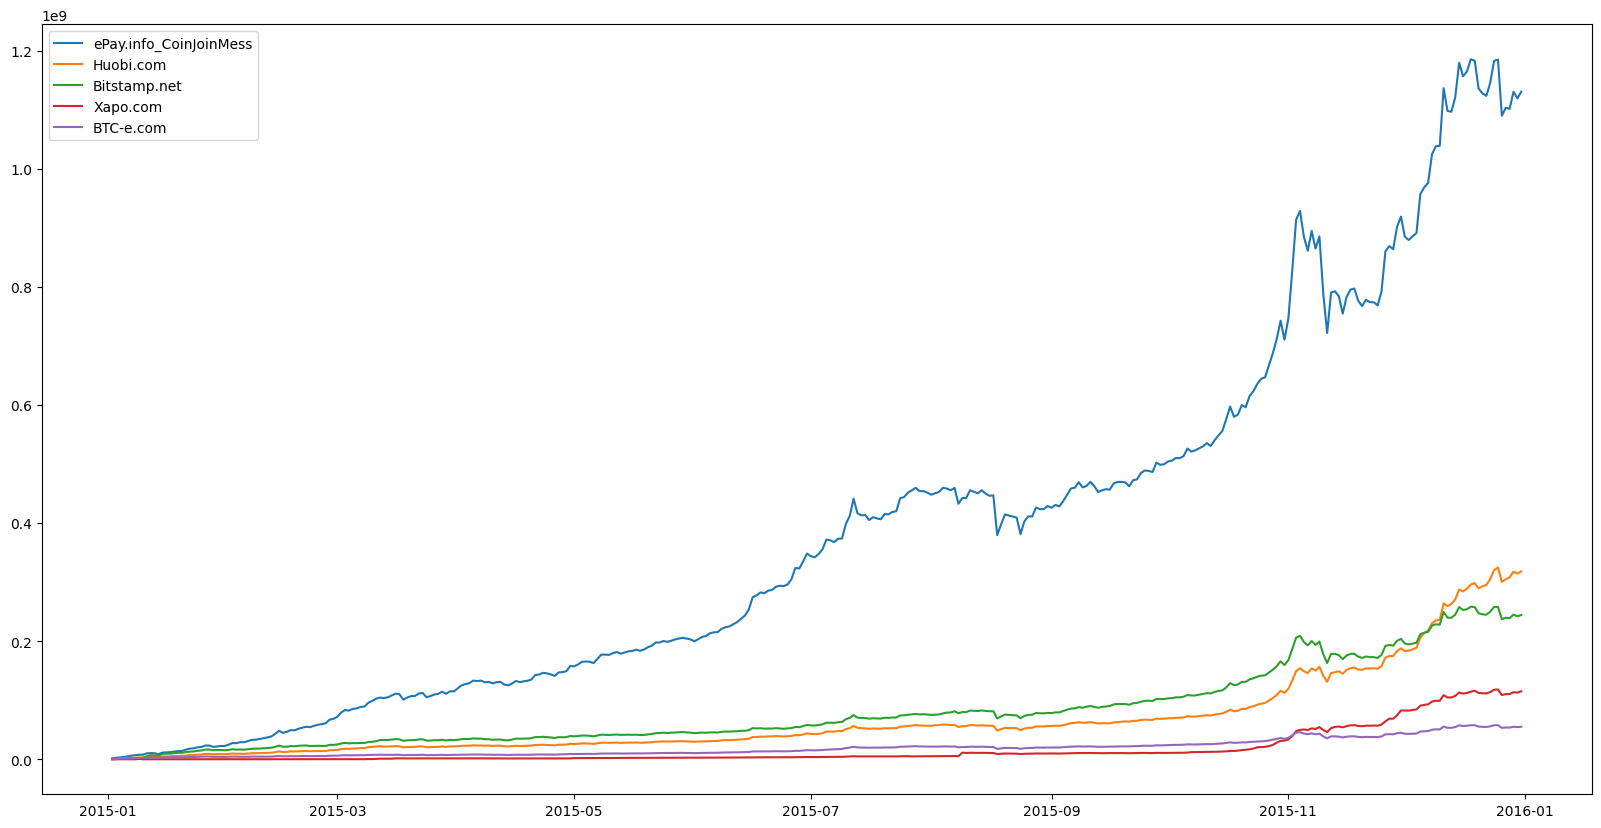

In [509]:
plt.figure(figsize=(20,10))
look = ['profit_usd']
for elt in top_actors:
    plt.plot(actor_profits_df.loc[elt].index, actor_profits_df.loc[elt][look], label=elt)

plt.legend()
plt.show()


part des échanges par acteurs (par tranche de 25% ? quartiles)
-> essayer de voir si les acteurs les plus gros échangent bien plus ?
-> a quel point ?

In [510]:
# make a df of all the actors and their final profit and profit_usd
final_profits_df = actor_profits_df.groupby(level=0)[['profit', 'profit_usd']].max().sort_values(by='profit_usd', ascending=False)
final_profits_df.head(7)

,profit,profit_usd
identity,,
ePay.info_CoinJoinMess,2.631645e+15,1.185568e+09
Huobi.com,7.404631e+14,3.248009e+08
Bitstamp.net,5.688628e+14,2.584437e+08
Xapo.com,2.679516e+14,1.181836e+08
BTC-e.com,1.281194e+14,5.774306e+07
107,8.720245e+13,3.819085e+07
OKCoin.com,6.978597e+13,3.100916e+07


In [511]:
# divide the actors into quartiles based on their profit
final_profits_df['quartile'] = pd.qcut(final_profits_df['profit_usd'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
final_profits_df

,profit,profit_usd,quartile
identity,,,
ePay.info_CoinJoinMess,2.631645e+15,1.185568e+09,Q4
Huobi.com,7.404631e+14,3.248009e+08,Q4
Bitstamp.net,5.688628e+14,2.584437e+08,Q4
Xapo.com,2.679516e+14,1.181836e+08,Q4
BTC-e.com,1.281194e+14,5.774306e+07,Q4
...,...,...,...
72472408,8.172299e+08,1.992902e+02,Q1
16768780,6.077411e+08,1.614744e+02,Q1
419,1.036196e+08,4.712120e+01,Q1


In [512]:
# print the total profit of each quartile
final_profits_df.groupby('quartile')['profit_usd'].sum()

quartile
Q1    1.243938e+04
Q2    2.506137e+05
Q3    3.402551e+06
Q4    2.100479e+09
Name: profit_usd, dtype: float64

In [513]:
# get the list of actors in each quartile
quartile_1 = final_profits_df[final_profits_df['quartile'] == 'Q1'].index.tolist()
quartile_2 = final_profits_df[final_profits_df['quartile'] == 'Q2'].index.tolist()
quartile_3 = final_profits_df[final_profits_df['quartile'] == 'Q3'].index.tolist()
quartile_4 = final_profits_df[final_profits_df['quartile'] == 'Q4'].index.tolist()

# get the number of transactions of each quartile
quartile_1_transactions = actor_df.loc[quartile_1]['nb_transactions'].sum()
quartile_2_transactions = actor_df.loc[quartile_2]['nb_transactions'].sum()
quartile_3_transactions = actor_df.loc[quartile_3]['nb_transactions'].sum()
quartile_4_transactions = actor_df.loc[quartile_4]['nb_transactions'].sum()

# print the number of transactions of each quartile 
print('Q1 transactions : ', quartile_1_transactions)
print('Q2 transactions : ', quartile_2_transactions)
print('Q3 transactions : ', quartile_3_transactions)
print('Q4 transactions : ', quartile_4_transactions)
print('Total transactions : ', actor_df['nb_transactions'].sum())

# print the number of transactions of each quartile in percentage
print('Q1 transactions : ', quartile_1_transactions / actor_df['nb_transactions'].sum() * 100)
print('Q2 transactions : ', quartile_2_transactions / actor_df['nb_transactions'].sum() * 100)
print('Q3 transactions : ', quartile_3_transactions / actor_df['nb_transactions'].sum() * 100)
print('Q4 transactions : ', quartile_4_transactions / actor_df['nb_transactions'].sum() * 100)
print('Total transactions : ',(quartile_1_transactions + quartile_2_transactions + quartile_3_transactions + quartile_4_transactions) / actor_df['nb_transactions'].sum())

# print the number of transactions of the top 5 actors
top_5_transactions = actor_df.loc[top_actors]['nb_transactions'].sum()
print('Top 5 transactions : ', top_5_transactions)
print('Top 5 transactions : ', top_5_transactions / actor_df['nb_transactions'].sum() * 100)

#print the number of actors
print('Number of actors : ', len(final_profits_df.index.get_level_values(0).unique()))


Q1 transactions :  148560
Q2 transactions :  396046
Q3 transactions :  575885
Q4 transactions :  5056946
Total transactions :  6177437
Q1 transactions :  2.4048808591653787
Q2 transactions :  6.411170198902878
Q3 transactions :  9.322393737078986
Q4 transactions :  81.86155520485275
Total transactions :  1.0
Top 5 transactions :  2602244
Top 5 transactions :  42.124978368860745
Number of actors :  100


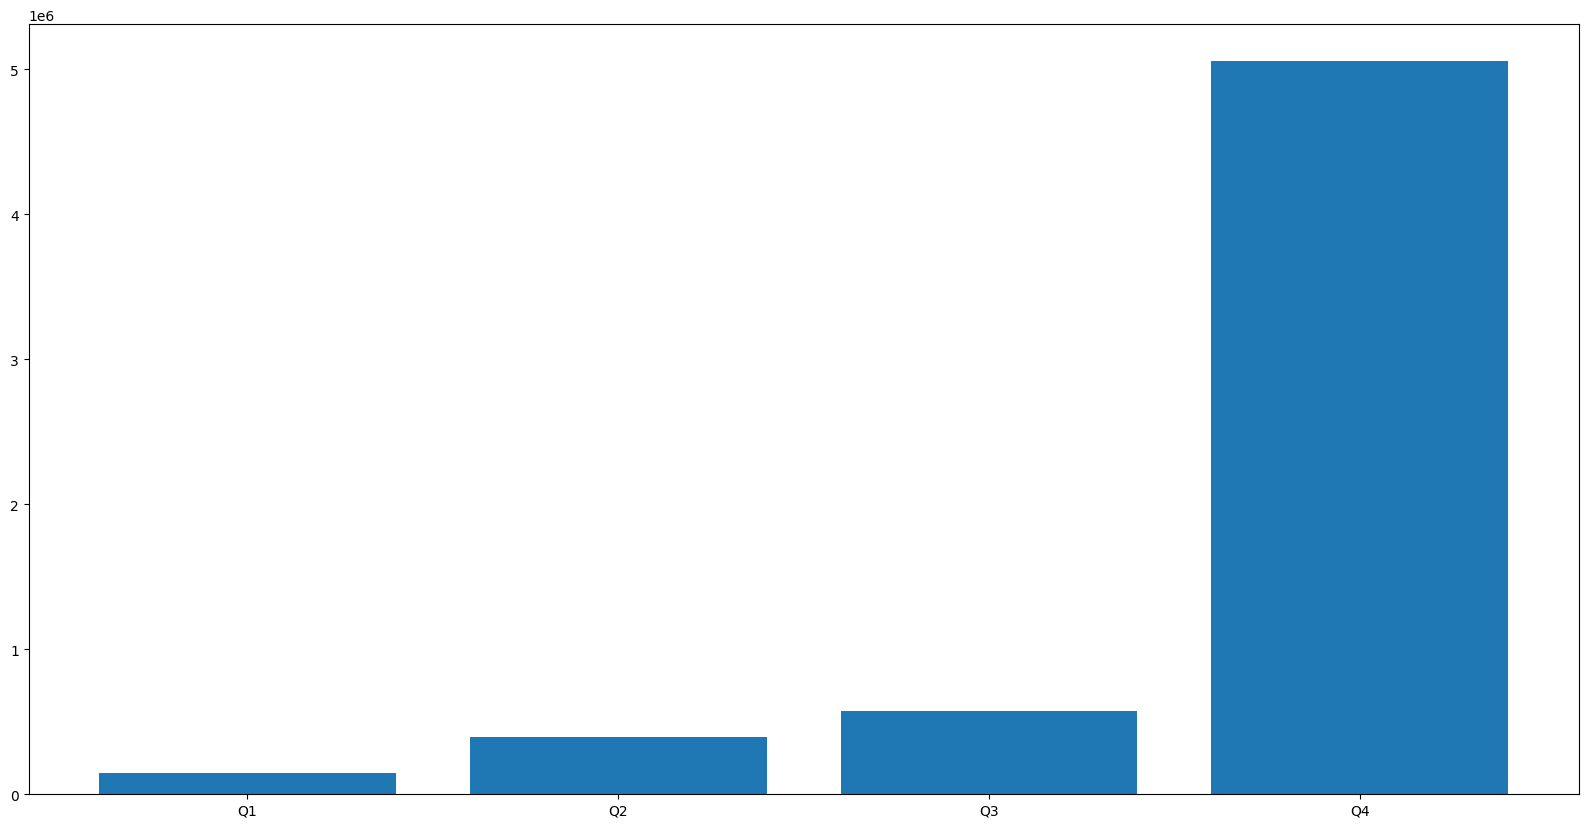

In [514]:
# plot the number of transactions of each quartile
plt.figure(figsize=(20,10))
plt.bar(['Q1', 'Q2', 'Q3', 'Q4'], [quartile_1_transactions, quartile_2_transactions, quartile_3_transactions, quartile_4_transactions])
plt.show()

In [515]:
# look at the mean_fee_for100 for each actor and update the final_profits_df dataframe
final_profits_df['mean_fee_for100'] = actor_df.groupby(level=0)['mean_fee_for100'].mean()

# add every actor_df column to the final_profits_df dataframe
l = ["received", "nb_received", "sum_fee", "mean_fee_for100", "nb_transactions", "sent", "self_spent", "self_spent_estimated", "nb_spent", "spent"]
l = ["mean_fee_for100", "nb_transactions"]
for elt in l:
    final_profits_df[elt] = actor_df.groupby(level=0)[elt].sum()


final_profits_df.head()



,profit,profit_usd,quartile,mean_fee_for100,nb_transactions
identity,,,,,
ePay.info_CoinJoinMess,2.631645e+15,1.185568e+09,Q4,996.025937,1784401
Huobi.com,7.404631e+14,3.248009e+08,Q4,3.250980,462394
Bitstamp.net,5.688628e+14,2.584437e+08,Q4,89.150888,53525
Xapo.com,2.679516e+14,1.181836e+08,Q4,30.757921,269466
BTC-e.com,1.281194e+14,5.774306e+07,Q4,11.948425,32458


In [516]:
# add identity to the final_profits_df dataframe
final_profits_df['identity'] = final_profits_df.index.get_level_values(0).unique()

# add a log scale column of the profit
final_profits_df['log_profit'] = np.log(np.abs(final_profits_df['profit_usd']))

fig = px.sunburst(final_profits_df, path=['quartile', 'identity'], values='nb_transactions', color='log_profit', color_continuous_scale='RdBu', hover_data={'profit_usd':':.2e'})

fig.show()




In [517]:
fig = px.treemap(final_profits_df, path=[px.Constant('actors'), 'quartile', 'identity'], values='nb_transactions', color='log_profit', color_continuous_scale='RdBu', hover_data={'profit_usd':':.2e'})
fig.show()

On voit que sur l'année 20154 une poignée d'acteurs ont totalement dominé le marché ... TODO

maintenant qu'on a identifié les plus gros acteurs et leur part dans le nombre de transactions :
-> comparer leurs stratégie avec les plus mauvais en période de crise

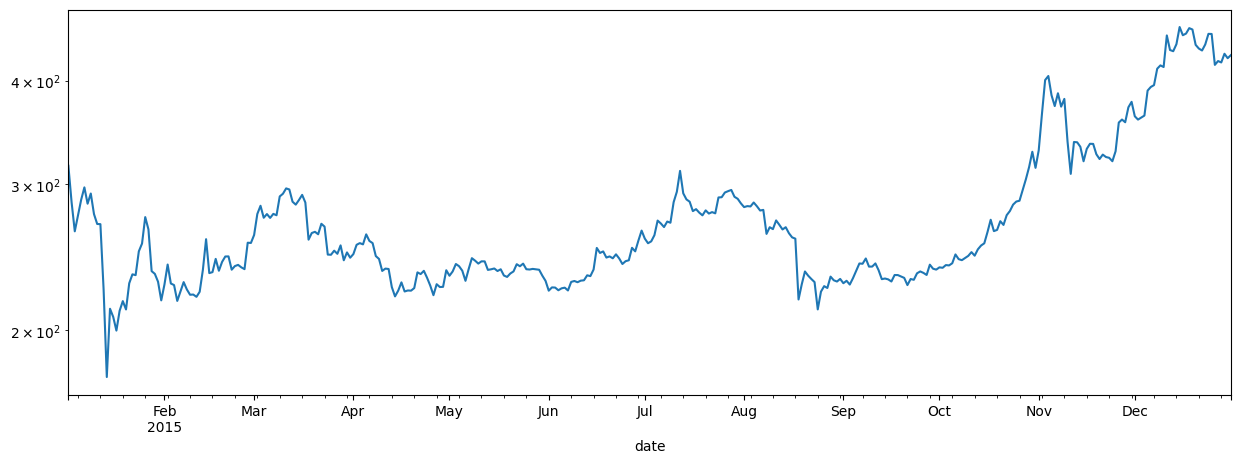

In [518]:
external_df['PriceUSD'].plot(figsize=(15, 5), logy=True)

plt.show()

zoom sur une pếriode de crise : ici on identifie une forte baisse de la valeur du bitcoin de aout 2015

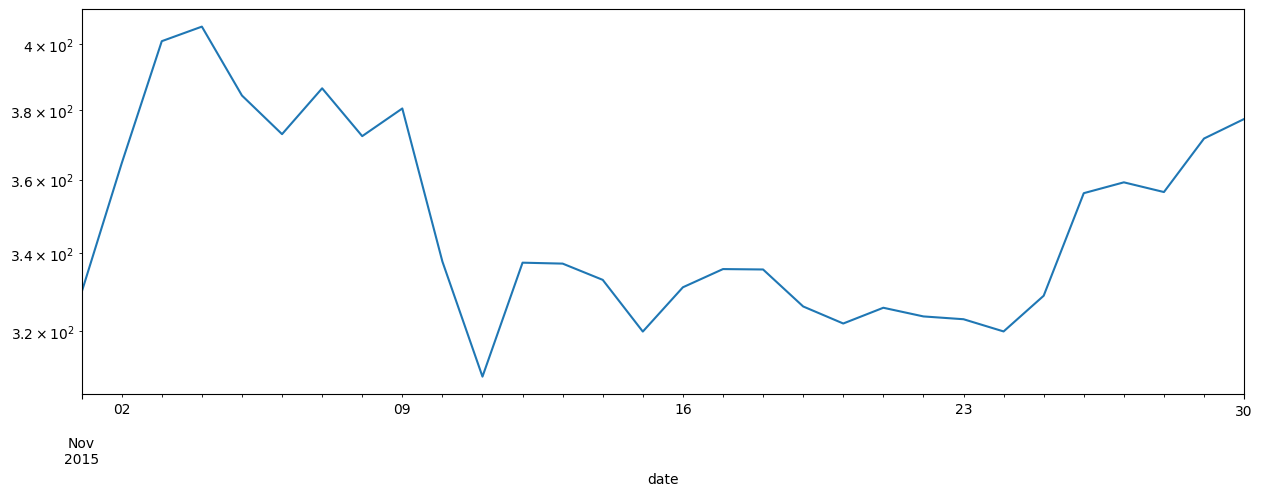

In [519]:
# look at the date range from 2015-08-01 to 2015-08-31
external_df['PriceUSD'].loc['2015-11-01':'2015-11-30'].plot(figsize=(15, 5), logy=True)

plt.show()

on veut regarder le nombre de transaction, les sommes dépensées et recue sur cette période

In [520]:
# for each quartile, on the range from 2015-08-01 to 2015-08-31, plot the number of transactions
#actor_df.set_index('identity', inplace=True)
#actor_df = actor_df.groupby([actor_df.index, 'date']).sum()

# set the date as a column
actor_df.reset_index(inplace=True)

# set the date as the index
actor_df.set_index('date', inplace=True)

# only keep the date range from 2015-08-01 to 2015-08-31
actor_df_2015_08 = actor_df.loc['2015-11-01':'2015-11-30']

actor_df_2015_08.reset_index(inplace=True)
actor_df_2015_08.set_index('identity', inplace=True)
actor_df_2015_08 = actor_df_2015_08.groupby([actor_df_2015_08.index, 'date']).sum()

actor_df_2015_08

received  nb_received    sum_fee  \
identity               date                                               
0                      2015-11-01  1.457313e+11        16997   84874746   
                       2015-11-02  2.717801e+11        13153  122342162   
                       2015-11-03  6.331670e+11        15616   55481584   
                       2015-11-04  5.413288e+11        14845   47365867   
                       2015-11-05  2.455865e+11        13319   38030488   
...                                         ...          ...        ...   
ePay.info_CoinJoinMess 2015-11-26  1.896020e+12        22211   71764296   
                       2015-11-27  1.542901e+12        17981   61161311   
                       2015-11-28  1.021978e+12        19827   64537191   
                       2015-11-29  1.009618e+12        10613   68014092   
                       2015-11-30  3.188197e+12        31741   98761783   

                                   mean_fee_for100  nb_transactions  \
identity               date                                           
0                      2015-11-01         4.841977             1677   
                       2015-11-02         5.370333             1947   
                       2015-11-03         2.317590             2141   
                       2015-11-04         1.832006             2345   
                       2015-11-05         1.709851             2058   
...                                            ...              ...   
ePay.info_CoinJoinMess 2015-11-26         0.245410             2125   
                       2015-11-27         0.192660             1780   
                       2015-11-28         0.254257             2003   
                       2015-11-29        31.935201             3014   
                       2015-11-30         0.260796             2615   

                                           sent    self_spent  \
identity               date                                     
0                      2015-11-01  1.422501e+11  0.000000e+00   
                       2015-11-02  2.710091e+11  0.000000e+00   
                       2015-11-03  5.777020e+11  0.000000e+00   
                       2015-11-04  5.834329e+11  0.000000e+00   
                       2015-11-05  2.557457e+11  0.000000e+00   
...                                         ...           ...   
ePay.info_CoinJoinMess 2015-11-26  7.542670e+12  5.702013e+12   
                       2015-11-27  5.937492e+12  4.524285e+12   
                       2015-11-28  4.419856e+12  3.494721e+12   
                       2015-11-29  3.657564e+12  2.866478e+12   
                       2015-11-30  1.265127e+13  9.443279e+12   

                                   self_spent_estimated  nb_spent  \
identity               date                                         
0                      2015-11-01          4.999999e+10      3916   
                       2015-11-02          1.500645e+11      4685   
                       2015-11-03          3.933734e+11      4867   
                       2015-11-04          2.905505e+11      5302   
                       2015-11-05          1.005339e+11      4542   
...                                                 ...       ...   
ePay.info_CoinJoinMess 2015-11-26          5.702013e+12     27506   
                       2015-11-27          4.524285e+12     22537   
                       2015-11-28          3.514721e+12     24678   
                       2015-11-29          2.887933e+12     15914   
                       2015-11-30          9.443279e+12     36916   

                                          spent       balance        profit  
identity               date                                                  
0                      2015-11-01  9.225015e+10  5.339629e+10  3.187819e+13  
                       2015-11-02  1.209445e+11  1.507132e+11  3.202891e+13  
                       2015-11-03  1.843286e+11  4.487830e+11  3.247769e+13  
     

In [521]:
# group the actor_df_2015_08 dataframe by quartile
for elt in final_profits_df['quartile'].unique():
    print(elt)
    #print(actor_df_2015_08.loc[final_profits_df[final_profits_df['quartile'] == elt].index.tolist()]['nb_transactions'])
    # update the actor_df_2015_08 dataframe
    actor_df_2015_08['quartile'] = actor_df_2015_08.index.get_level_values(0).map(final_profits_df.set_index('identity')['quartile'])

# set the quartile as the index
actor_df_2015_08.reset_index(inplace=True)
actor_df_2015_08.set_index('quartile', inplace=True)

#group the actor_df_2015_08 dataframe by quartile
actor_df_2015_08 = actor_df_2015_08.groupby([actor_df_2015_08.index, 'date']).sum()

actor_df_2015_08


Q4
Q3
Q2
Q1


/tmp/ipykernel_5266/2299283748.py:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



received  nb_received    sum_fee  mean_fee_for100  \
quartile date                                                                
Q1       2015-11-01  1.634831e+10         1268    6404466        25.260517   
         2015-11-02  3.823489e+10         1133    7881882        20.876457   
         2015-11-03  3.586112e+10         1378    9558215        26.779125   
         2015-11-04  4.018727e+10         1618   10181751        21.022102   
         2015-11-05  3.013444e+10         1292    8526272        16.321884   
...                           ...          ...        ...              ...   
Q4       2015-11-26  1.564669e+13        71210  308327431         8.939447   
         2015-11-27  2.163680e+13        64340  270096297         8.133587   
         2015-11-28  9.952095e+12        81841  276786520         7.279070   
         2015-11-29  8.100190e+12        48232  239486919        42.202107   
         2015-11-30  1.525302e+13        93676  317897780         9.449425   

                     nb_transactions          sent    self_spent  \
quartile date                                                      
Q1       2015-11-01              336  1.588605e+10  0.000000e+00   
         2015-11-02              440  3.825396e+10  0.000000e+00   
         2015-11-03              519  3.745612e+10  0.000000e+00   
         2015-11-04              658  4.049716e+10  0.000000e+00   
         2015-11-05              567  2.906556e+10  0.000000e+00   
...                              ...           ...           ...   
Q4       2015-11-26            12730  2.545309e+13  1.003565e+13   
         2015-11-27            13067  2.276115e+13  1.061166e+13   
         2015-11-28            14202  1.861946e+13  8.503406e+12   
         2015-11-29            12169  2.092921e+13  1.319307e+13   
         2015-11-30            14886  4.848194e+13  3.324366e+13   

                     self_spent_estimated  nb_spent         spent  \
quartile date                                                       
Q1       2015-11-01          0.000000e+00       847  1.588605e+10   
         2015-11-02          0.000000e+00      1063  3.825396e+10   
         2015-11-03          0.000000e+00      1310  3.745612e+10   
         2015-11-04          0.000000e+00      1646  4.049716e+10   
         2015-11-05          0.000000e+00      1360  2.906556e+10   
...                                   ...       ...           ...   
Q4       2015-11-26          1.452680e+13     53738  1.092629e+13   
         2015-11-27          1.345342e+13     49473  9.307725e+12   
         2015-11-28          1.030642e+13     52739  8.313031e+12   
         2015-11-29          1.402407e+13     39555  6.905136e+12   
         2015-11-30          3.690379e+13     65807  1.157814e+13   

                          balance        profit  
quartile date                                    
Q1       2015-11-01  4.558519e+08  4.131937e+09  
         2015-11-02 -2.695346e+07  4.104984e+09  
         2015-11-03 -1.604558e+09  2.500426e+09  
         2015-11-04 -3.200677e+08  2.180358e+09  
         2015-11-05  1.060348e+09  3.240706e+09  
...                           ...           ...  
Q4       2015-11-26  1.475574e+13  3.994060e+15  
         2015-11-27  2.294046e+13  4.017000e+15  
         2015-11-28  1.014219e+13  4.027142e+15  
         2015-11-29  1.438789e+13  4.041530e+15  
         2015-11-30  3.691822e+13  4.078448e+15  

[120 rows x 12 columns]

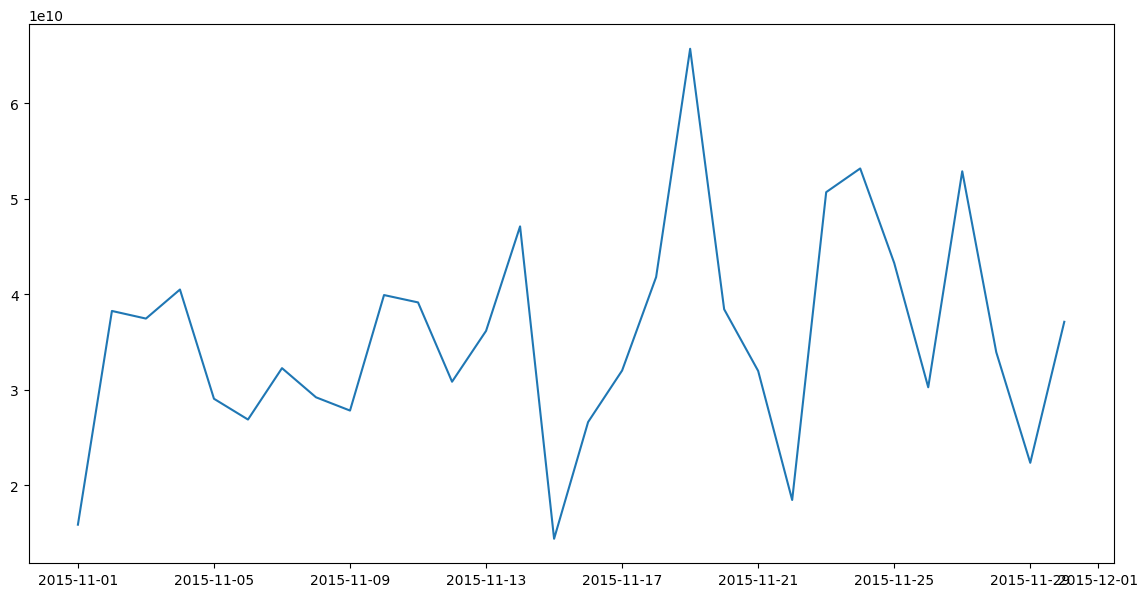

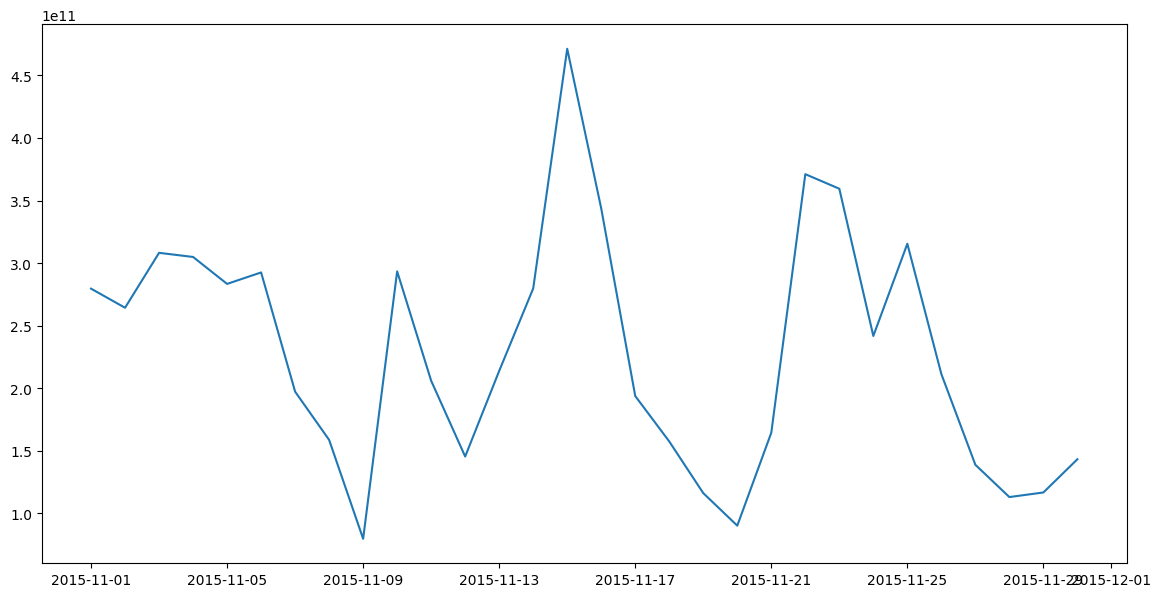

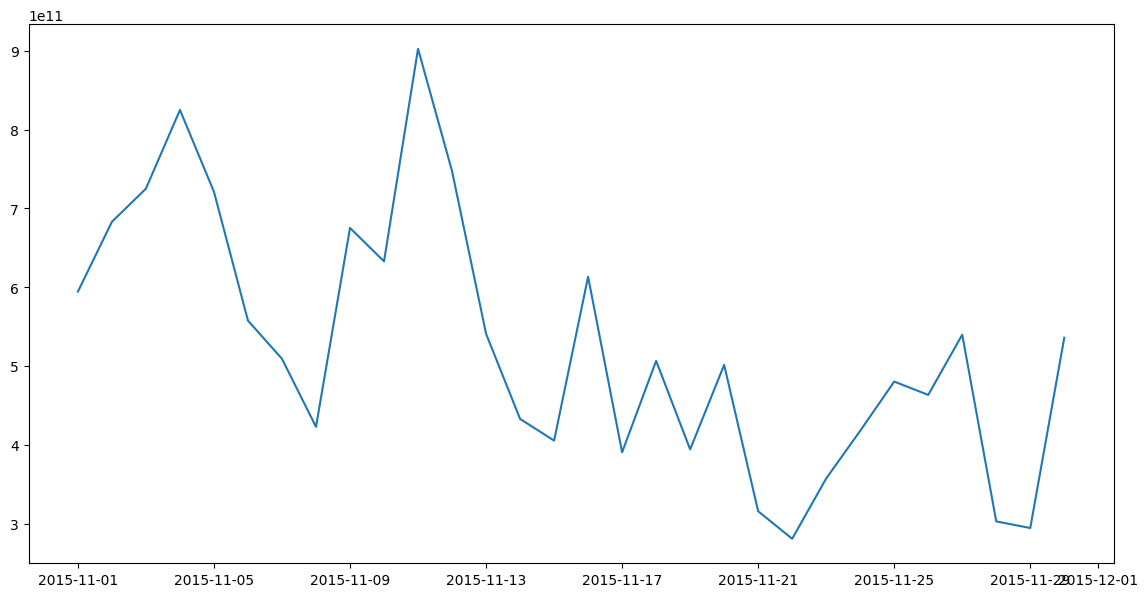

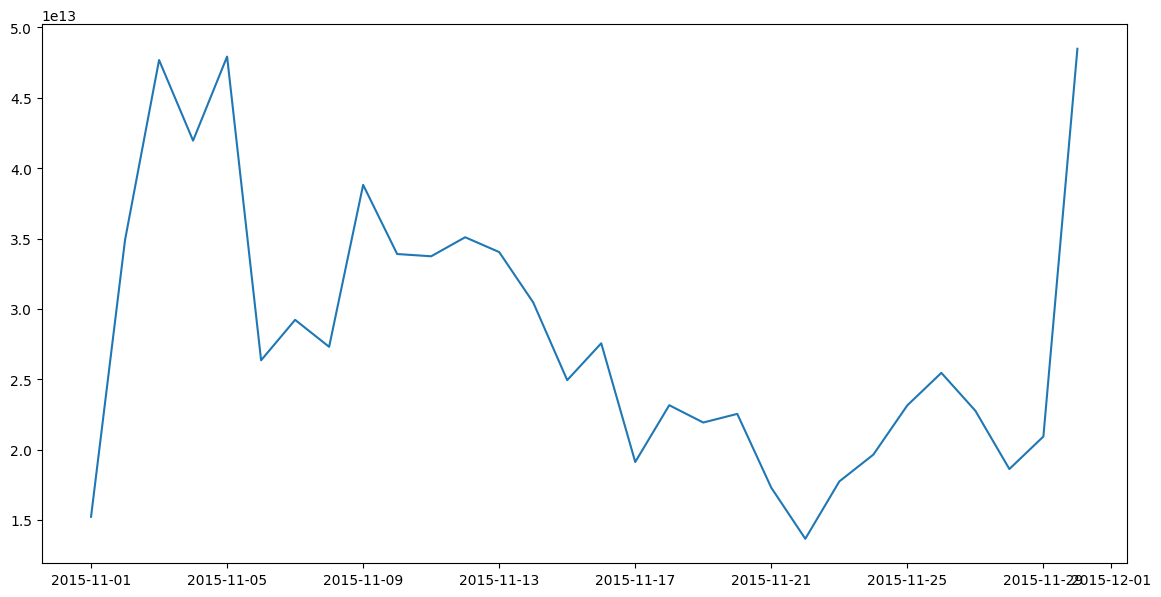

In [528]:
# plot the number of transactions of each quartile
look = 'sent'
plt.figure(figsize=(14,7))
plt.plot(actor_df_2015_08.loc['Q1'][look], label='Q1')
plt.show()
plt.figure(figsize=(14,7))
plt.plot(actor_df_2015_08.loc['Q2'][look], label='Q2')
plt.show()
plt.figure(figsize=(14,7))
plt.plot(actor_df_2015_08.loc['Q3'][look], label='Q3')
plt.show()
plt.figure(figsize=(14,7))
plt.plot(actor_df_2015_08.loc['Q4'][look], label='Q4')
plt.show()